In [40]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
%cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car/data"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car/data


In [43]:
df = pd.read_hdf('car.h5')
df.shape

(106494, 155)

In [44]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

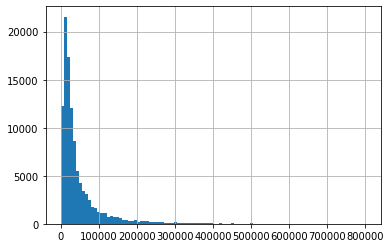

In [45]:
df['price_value'].hist(bins=100)

In [46]:
df['price_value'].max()

799900.0

In [47]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [48]:
df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

In [49]:
def group_and_barplot(feat_groupby,feat_agg = 'price_value', agg_funcs=[np.mean,np.median,np.size],feat_sort='mean',top=50,subplots=True):
    ax = df.groupby(feat_groupby)[feat_agg].agg(agg_funcs).sort_values(by=feat_sort,ascending=False).head(top)
    ax.plot(kind='bar',figsize=(15,15),subplots=subplots,grid=True)
    

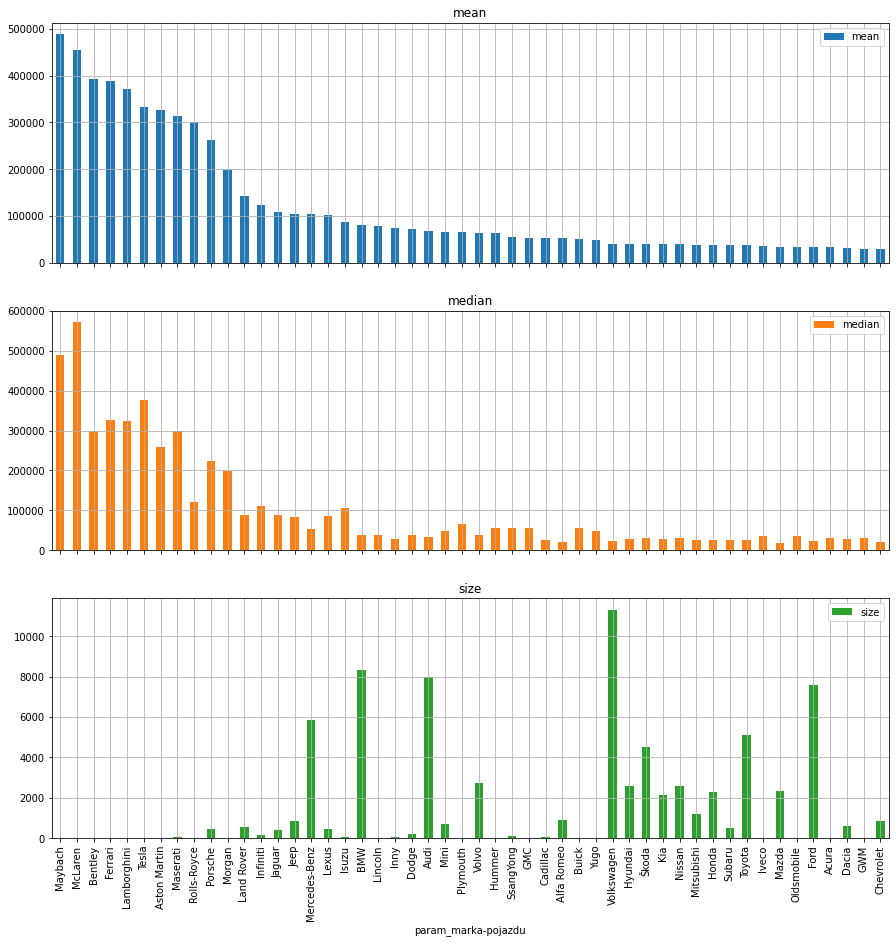

In [52]:
group_and_barplot('param_marka-pojazdu')

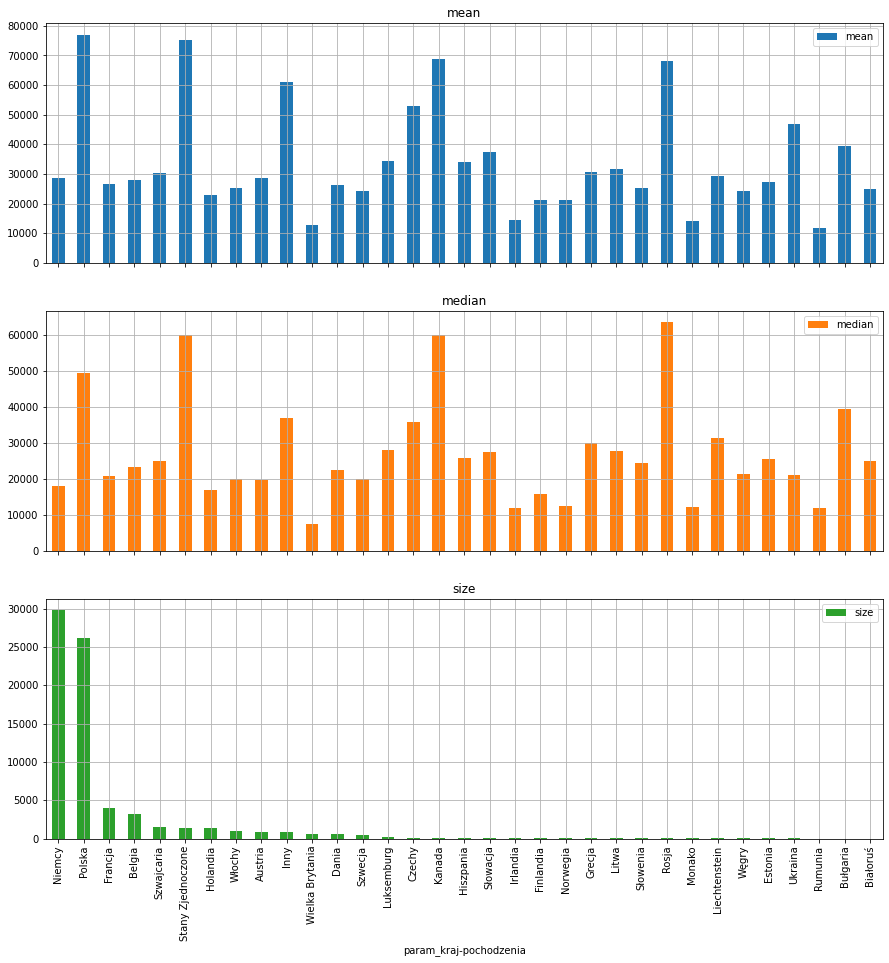

In [53]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size')

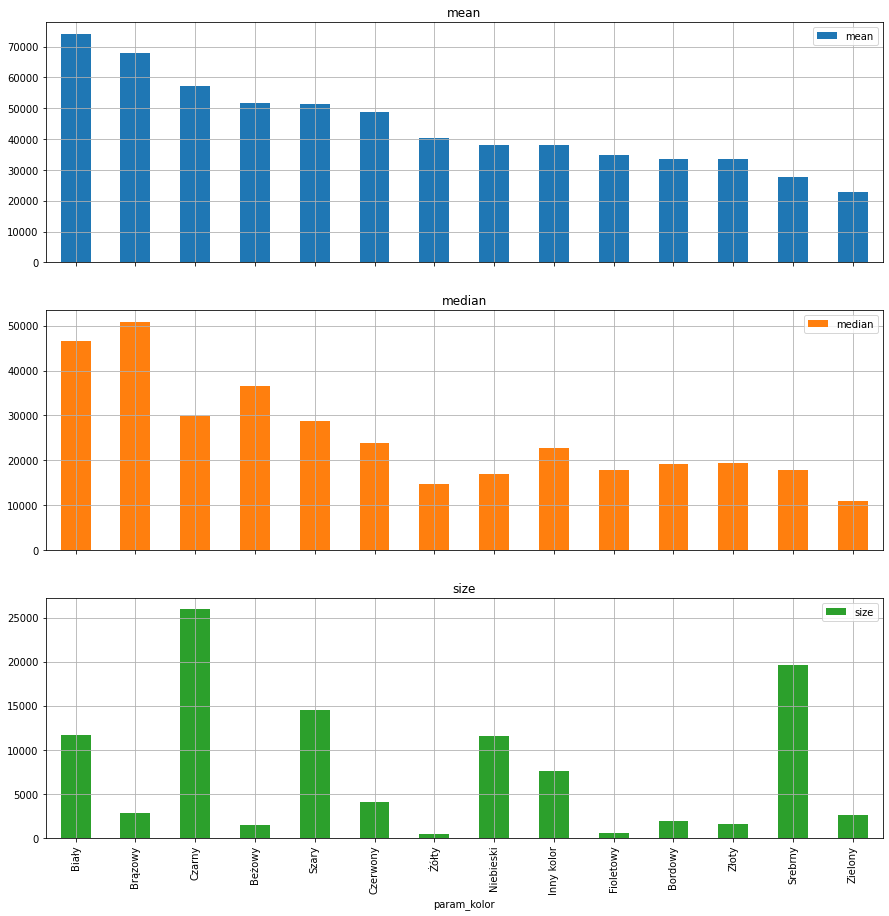

In [54]:
group_and_barplot('param_kolor',feat_sort='mean')